# Customer churn classification

Context

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents


In [49]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [50]:
df = pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Preprocessing and Data analysis

Looking at the table, customerID is useless.

In [51]:
#drop customerID
df.drop('customerID', axis = 1, inplace = True)
#features names and type
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

The MontlyCharges is a float but TotalCharges is a object. Why?

In [52]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [53]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

The values are strings actually, I need to convert it to numbers.

In [54]:
#convert it to numbers
#pd.to_numeric(df.TotalCharges) It gave an error because some samples are " "

#see the rows that has " ". It will ignore the errors and put NaN in the empty strings
pd.to_numeric(df.TotalCharges, errors = 'coerce')
#see the rows where is null
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [55]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [56]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()].shape

(11, 20)

In [57]:
df.shape

(7043, 20)

I can drop this rows because its only 11 rows out of 7043.

In [58]:
#drop the rows with " "
df1 = df[df.TotalCharges != " "]
df1.shape

(7032, 20)

In [59]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [60]:
#convert to numbers
df1 = df1.copy()
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])

In [61]:
df1.TotalCharges.dtypes

dtype('float64')

In [62]:
#customers that will not leave the company and number of months that they are client
tenure_churn_no = df1[df1.Churn == 'No'].tenure
#customers that will leave the company and number of months that they were client
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

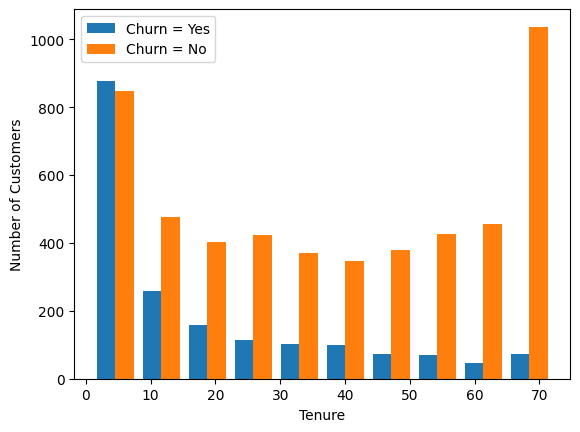

In [63]:
#histogram of tenure side by side
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.hist([tenure_churn_yes, tenure_churn_no], label = ['Churn = Yes', 'Churn = No'])
plt.legend()

The people that are at most time with the company, 70 months, will not leave the company.

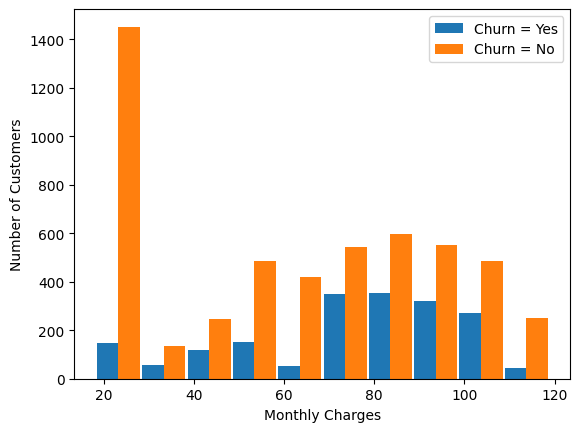

In [64]:
#visualize the montly charges
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')

plt.hist([mc_churn_yes, mc_churn_no], rwidth = 0.95,label = ['Churn = Yes', 'Churn = No'])
plt.legend()

Many of the columns has yes and no, so I want to find the unique values in each column and figure out the yes/no columns and do label encoding.

In [65]:
#print values for all the categorical columns
def print_unique_col_values(df):
  for column in df:
      if df[column].dtypes == 'object':
        print(f'{column}: {df[column].unique()}')

In [66]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In some features, 'No internet service' or 'No phone service' should be just No.

In [67]:
#replace with no
df1.replace('No internet service', 'No', inplace = True)
df1.replace('No phone service', 'No', inplace = True)

In [68]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Replace YES and NO to 0.

In [69]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [70]:
for col in yes_no_columns:
  df1[col].replace({'Yes': 1, 'No': 0}, inplace = True)

In [71]:
for column in df1:
      print(f'{column}: {df1[column].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [72]:
#replace gender by 1 and 0
df1['gender'].replace({'Female':1, 'Male': 0}, inplace = True)

In [73]:
df1['gender'].unique()

array([1, 0])

InternetService, Contract and PaymentMethod has more than one category so it will do one hot encoding.

In [74]:
df2 = pd.get_dummies(data = df1, columns = ['InternetService','Contract','PaymentMethod' ])
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [75]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [76]:
#scale the data
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [77]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
675,0,1,0,0,0.901408,1,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
2393,1,0,1,1,0.450704,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
5391,1,0,0,0,0.070423,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
6961,1,0,1,0,0.323944,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


## Model

In [78]:
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)

In [80]:
X_train.shape

(5625, 26)

In [81]:
X_test.shape

(1407, 26)

In [82]:
import tensorflow as tf
from tensorflow import keras

def get_model():
    model = keras.Sequential([
    keras.layers.Dense(26, input_shape = (26,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
    ])

    model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
    return model

with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5648 - accuracy: 0.6978
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4442 - accuracy: 0.7872
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4317 - accuracy: 0.7876
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.7963
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.7989
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.7972
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.8004
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.8011
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8037
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4190 - accura

In [83]:
cpu_model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4204 - accuracy: 0.8003


[0.42043405771255493, 0.8002842664718628]

In [84]:
yp = cpu_model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.01229851],
       [0.2848252 ],
       [0.12472384],
       [0.00351059],
       [0.32782713]], dtype=float32)

I need to convert it to one dimension array and convert the values to 0 and 1. If is > 0.5 it will be 1, < 0.5 to 0.

In [91]:
y_test[:10]

1888    0
5398    0
2622    0
531     0
1472    1
2035    0
4838    0
5505    0
3528    1
3279    0
Name: Churn, dtype: int64

In [86]:
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [90]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [92]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1041
           1       0.64      0.54      0.58       366

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



Text(95.72222222222221, 0.5, 'Truth')

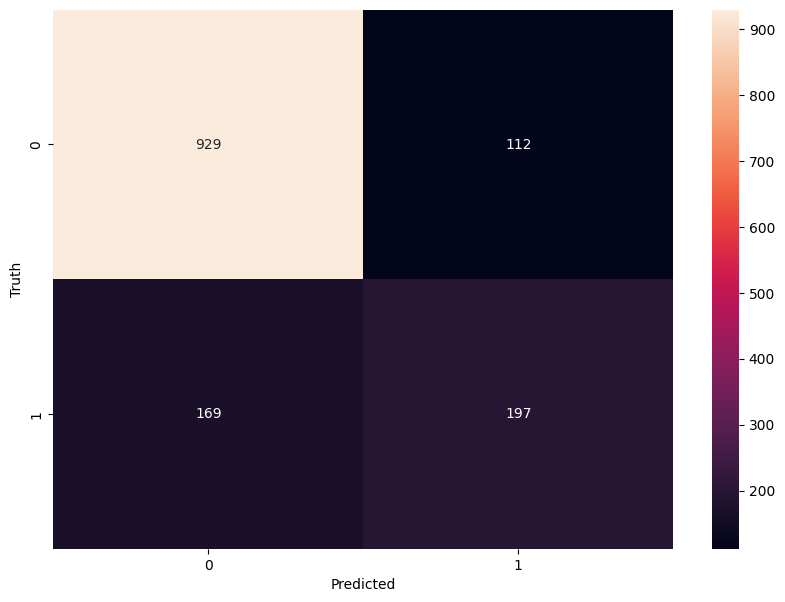

In [93]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')